In [1]:
from jupyterthemes import jtplot
jtplot.style()

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv("/home/dalmas/Documents/2019 projects/1. work/projects/fraud detection/external_data_credit_card.csv",encoding = "ISO-8859-1")
#data=data.dropna()

/home/dalmas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data[data["accountID"]=='*754504168']

,transactionID,accountID,TransactionamountUSD,transactionAmount,transactionCurrencyCode,transactionCurrencyConversionRate,transactionDate,transactionTime,localHour,transactionScenario,transactionType,transactionIPaddress,ipState,ipPostcode,ipCountryCode,isProxyIP,browserLanguage,paymentInstrumentType,cardType,paymentBillingPostalCode,paymentBillingState,paymentBillingCountryCode,cvvVerifyResult,digitalItemCount,physicalItemCount,Fraudulent


In [9]:
data.tail(20)

,transactionID,accountID,TransactionamountUSD,transactionAmount,transactionCurrencyCode,transactionCurrencyConversionRate,transactionDate,transactionTime,localHour,transactionScenario,transactionType,transactionIPaddress,ipState,ipPostcode,ipCountryCode,isProxyIP,browserLanguage,paymentInstrumentType,cardType,paymentBillingPostalCode,paymentBillingState,paymentBillingCountryCode,cvvVerifyResult,digitalItemCount,physicalItemCount,Fraudulent
199980,DD3AF244-099A-424A-AA67-8005E202BBA7,A308032043111205,102.314394,5499.00,INR,0.018606,20130927,92136,14.0,A,P,120.630,maharashtra,400000,in,False,en-IN,CREDITCARD,VISA,400092,Maharashtra,IN,NaN,1,0,0
199981,CF8DCCE9-F239-49BB-A186-FC7FC2D1066E,A985156456322608,107.810522,79.99,EUR,1.3478,20130927,102702,11.0,A,P,78.240,isere,38090,fr,False,fr-FR,PAYPAL,NaN,NaN,NaN,FR,NaN,0,1,0
199982,E62F61CF-2595-4A7E-88F3-7A072A38DB13,A844427924603444,103.489650,99.00,AUD,1.04535,20130927,105322,20.0,A,P,60.241,new south wales,1005,au,False,en-AU,PAYPAL,NaN,NaN,NaN,AU,NaN,1,0,0
199983,DD022D7C-8DC5-44F8-97E9-3CEF777E5364,A1055521305523350,1180.200150,1129.00,AUD,1.04535,20130927,105554,20.0,A,P,60.225,new south wales,1005,au,False,en-AU,PAYPAL,NaN,NaN,NaN,AU,NaN,0,1,0
199984,EE071578-930C-49D6-9FF4-A95927185E94,A1688853650200460,3.625582,2.69,EUR,1.3478,20130927,120138,4.0,A,P,131.107,washington,98052,us,False,de-DE,CREDITCARD,VISA,14195,NaN,DE,NaN,1,0,0
199985,C3E4AA91-A248-4611-B5EA-3E0FC6BDB002,A985157126096230,233.190000,233.19,USD,1,20130927,115414,6.0,A,P,74.134,kentucky,40205,us,False,en-US,PAYPAL,NaN,NaN,NaN,US,NaN,1,0,0
199986,CAB0EA23-0089-41CD-B1D3-BBC842C7D46C,A985156750287741,499.000000,499.00,USD,1,20130927,124556,20.0,A,P,123.890,beijing shi,100000,cn,False,en-US,PAYPAL,NaN,NaN,NaN,CN,NaN,0,1,0
199987,488CA269-CB58-4593-AC4B-81F7693527F8,A844428073616041,187.344200,139.00,EUR,1.3478,20130927,132042,14.0,A,P,77.188,berlin,10178,de,False,de-DE,PAYPAL,NaN,NaN,NaN,DE,NaN,1,0,0
199988,5534D480-1237-45C5-9FA9-12FDDB67D7AF,A985157126207779,102.314394,5499.00,INR,0.018606,20130927,142332,19.0,A,P,122.161,delhi,0,in,False,en-IN,CREDITCARD,VISA,110027,National Capital Territory of Delhi,IN,NaN,1,0,0
199989,04F1A7BD-E9DD-4697-8D52-5004ABA904B8,A844427833254889,139.990000,139.99,USD,1,20130927,144810,7.0,A,P,24.800,colorado,80004,us,False,en-US,PAYPAL,NaN,NaN,NaN,US,NaN,1,0,0


# Cleaning missing values

In [230]:
data.isna().sum()*100/data.shape[0]

transactionID                         0.0000
accountID                             0.0000
TransactionamountUSD
                 0.0005
transactionAmount                     0.0000
transactionCurrencyCode               0.0000
transactionCurrencyConversionRate     0.0000
transactionDate                       0.0000
transactionTime                       0.0000
localHour                             3.5120
transactionScenario                   0.0000
transactionType                       0.0000
transactionIPaddress                  0.0000
ipState                               0.0070
ipPostcode                            0.0070
ipCountryCode                         0.0065
isProxyIP                             1.2185
browserLanguage                       0.0000
paymentInstrumentType                 0.0000
cardType                              9.4695
paymentBillingPostalCode             11.6465
paymentBillingState                  28.1625
paymentBillingCountryCode             1.4780
cvvVerifyR

#### cleaning paymentBillingState

In [231]:
data['paymentBillingState']=data['paymentBillingState'].fillna("blank")

In [232]:
data[["paymentBillingState","transactionID"]].groupby("paymentBillingState").count()

,transactionID
paymentBillingState,
-,2
0,1
13,2
28,1
3,1
44,1
6,1
73,1
?.???????,1


In [233]:
paymentBillingState_l=[]
for i in data["paymentBillingState"]:
    if ('?' in str(i)):
        paymentBillingState_l.append('blank')
    elif ('¿' in str(i)):
        paymentBillingState_l.append('blank')
    else:
        paymentBillingState_l.append(i)

In [234]:
data["paymentBillingState_clean"]=paymentBillingState_l

In [235]:
data=data.drop(['paymentBillingState','paymentBillingPostalCode'],axis=1)
data[["paymentBillingState_clean","transactionID"]].groupby("paymentBillingState_clean").count()

,transactionID
paymentBillingState_clean,
-,2
0,1
13,2
28,1
3,1
44,1
6,1
73,1
AA,10


In [236]:
data.isna().sum()*100/data.shape[0]

transactionID                         0.0000
accountID                             0.0000
TransactionamountUSD
                 0.0005
transactionAmount                     0.0000
transactionCurrencyCode               0.0000
transactionCurrencyConversionRate     0.0000
transactionDate                       0.0000
transactionTime                       0.0000
localHour                             3.5120
transactionScenario                   0.0000
transactionType                       0.0000
transactionIPaddress                  0.0000
ipState                               0.0070
ipPostcode                            0.0070
ipCountryCode                         0.0065
isProxyIP                             1.2185
browserLanguage                       0.0000
paymentInstrumentType                 0.0000
cardType                              9.4695
paymentBillingCountryCode             1.4780
cvvVerifyResult                      11.2545
digitalItemCount                      0.0000
physicalIt

#### cleaning cvvVerifyResult

In [237]:
data['cvvVerifyResult']=data['cvvVerifyResult'].fillna("blank")
data['cardType']=data['cardType'].fillna("blank")
data[["cardType","transactionID"]].groupby("cardType").count()

,transactionID
cardType,
AMEX,19891
DISCOVER,4430
JCB,296
MC,48473
VISA,107971
blank,18939


In [238]:
data[["cvvVerifyResult","transactionID"]].groupby("cvvVerifyResult").count()

,transactionID
cvvVerifyResult,
M,174965
N,460
P,561
S,31
U,289
X,1142
Y,43
blank,22509


In [239]:
print(data.shape)
data.isna().sum()*100/data.shape[0]

(200000, 25)


transactionID                        0.0000
accountID                            0.0000
TransactionamountUSD
                0.0005
transactionAmount                    0.0000
transactionCurrencyCode              0.0000
transactionCurrencyConversionRate    0.0000
transactionDate                      0.0000
transactionTime                      0.0000
localHour                            3.5120
transactionScenario                  0.0000
transactionType                      0.0000
transactionIPaddress                 0.0000
ipState                              0.0070
ipPostcode                           0.0070
ipCountryCode                        0.0065
isProxyIP                            1.2185
browserLanguage                      0.0000
paymentInstrumentType                0.0000
cardType                             0.0000
paymentBillingCountryCode            1.4780
cvvVerifyResult                      0.0000
digitalItemCount                     0.0000
physicalItemCount               

In [240]:
data=data.dropna()
data.isna().sum()*100/data.shape[0]

transactionID                        0.0
accountID                            0.0
TransactionamountUSD
                0.0
transactionAmount                    0.0
transactionCurrencyCode              0.0
transactionCurrencyConversionRate    0.0
transactionDate                      0.0
transactionTime                      0.0
localHour                            0.0
transactionScenario                  0.0
transactionType                      0.0
transactionIPaddress                 0.0
ipState                              0.0
ipPostcode                           0.0
ipCountryCode                        0.0
isProxyIP                            0.0
browserLanguage                      0.0
paymentInstrumentType                0.0
cardType                             0.0
paymentBillingCountryCode            0.0
cvvVerifyResult                      0.0
digitalItemCount                     0.0
physicalItemCount                    0.0
Fraudulent                           0.0
paymentBillingSt

In [241]:
data.shape

(187823, 25)

In [242]:
data.head()

,transactionID,accountID,TransactionamountUSD,transactionAmount,transactionCurrencyCode,transactionCurrencyConversionRate,transactionDate,transactionTime,localHour,transactionScenario,transactionType,transactionIPaddress,ipState,ipPostcode,ipCountryCode,isProxyIP,browserLanguage,paymentInstrumentType,cardType,paymentBillingCountryCode,cvvVerifyResult,digitalItemCount,physicalItemCount,Fraudulent,paymentBillingState_clean
0,3B9D4BC1-0E82-436C-BBD9-D0592626D876,A985156116631561,5.36,5.36,USD,1,20130526,215203,16.0,A,P,67.80,new york,10590,us,False,en-US,CREDITCARD,VISA,US,Y,1,0,0,NY
1,EE56CE89-87FD-4DF2-968E-F1B802E944C6,A1688852230369860,4.99,4.99,USD,1,20130526,23702,18.0,A,P,76.94,california,92553,us,False,en-US,CREDITCARD,VISA,US,Y,1,0,0,CA
2,AA983B13-417D-476D-BD28-9BF8E645E65A,A362909400662737,4.99,4.99,USD,1,20130524,195208,11.0,A,P,24.50,california,94566,us,False,en-US,CREDITCARD,AMEX,US,Y,1,0,0,CA
3,06B7426D-87C7-49CF-9556-B04A5039D7CD,A362909400662737,4.99,4.99,USD,1,20130524,200850,12.0,A,P,24.50,california,94566,us,False,en-US,CREDITCARD,AMEX,US,Y,1,0,0,CA
4,D5DE3BF7-B679-4388-A294-1CE565E8A25F,A362909400662737,4.99,4.99,USD,1,20130524,205433,12.0,A,P,24.50,california,94566,us,False,en-US,CREDITCARD,AMEX,US,Y,1,0,0,CA


In [243]:
data.dtypes

transactionID                         object
accountID                             object
TransactionamountUSD
                float64
transactionAmount                    float64
transactionCurrencyCode               object
transactionCurrencyConversionRate     object
transactionDate                        int64
transactionTime                        int64
localHour                            float64
transactionScenario                   object
transactionType                       object
transactionIPaddress                 float64
ipState                               object
ipPostcode                            object
ipCountryCode                         object
isProxyIP                             object
browserLanguage                       object
paymentInstrumentType                 object
cardType                              object
paymentBillingCountryCode             object
cvvVerifyResult                       object
digitalItemCount                       int64
physicalIt

## EXTERNAL DATA EXPLORATION

#### 1. Frauduluent

In [244]:
df=data[['Fraudulent','transactionID']].groupby('Fraudulent').count()
df

,transactionID
Fraudulent,
0,186717
1,1106


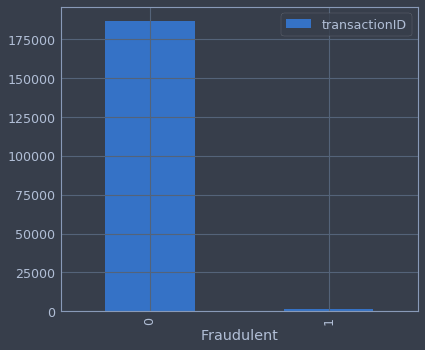

In [245]:
df.plot.bar()

Fraudulent data is highly imbalanced. There will be need to solve the imbalanced data problem before modelling.

#### 2. physicalItemCount

In [246]:
data[['physicalItemCount']].describe().T

,count,mean,std,min,25%,50%,75%,max
physicalItemCount,187823.0,0.346491,1.018291,0.0,0.0,0.0,0.0,29.0


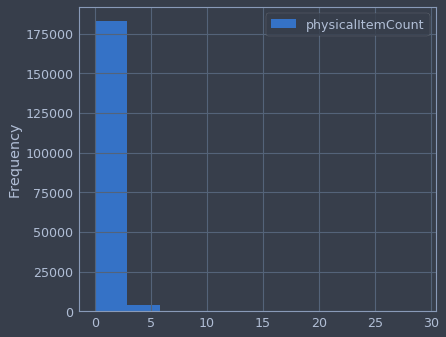

In [247]:
data[['physicalItemCount']].plot.hist()

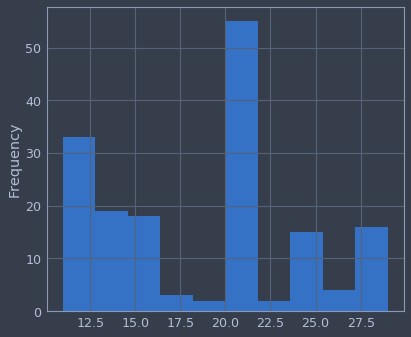

In [248]:
data[data['physicalItemCount']>10]['physicalItemCount'].plot.hist()
plt.show()

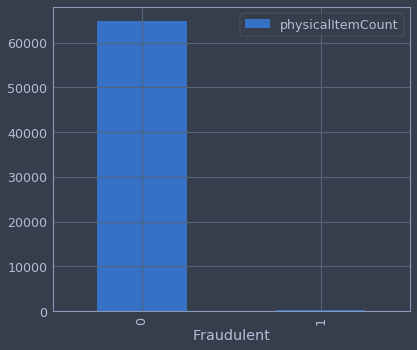

In [249]:
df=data[['physicalItemCount','Fraudulent']].groupby('Fraudulent').sum()
df.plot.bar()
plt.show()

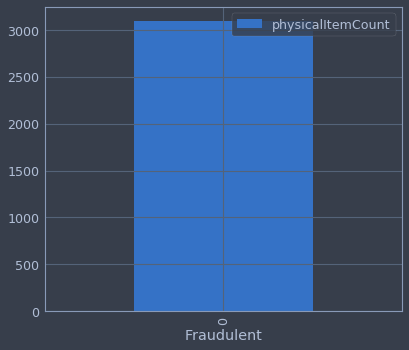

In [250]:
df=data[data['physicalItemCount']>10][['physicalItemCount','Fraudulent']].groupby('Fraudulent').sum()
df.plot.bar()
plt.show()

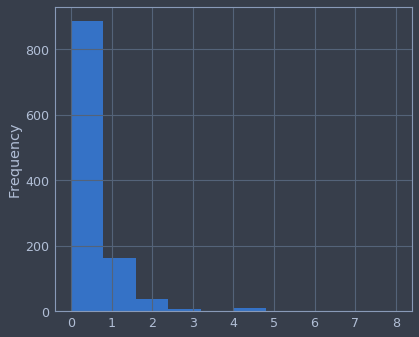

In [251]:
data[data['Fraudulent']==1]['physicalItemCount'].plot.hist()
plt.show()

#### 3. digitalItemCount

In [252]:
data[['digitalItemCount']].describe().T

,count,mean,std,min,25%,50%,75%,max
digitalItemCount,187823.0,0.862546,0.575054,0.0,1.0,1.0,1.0,30.0


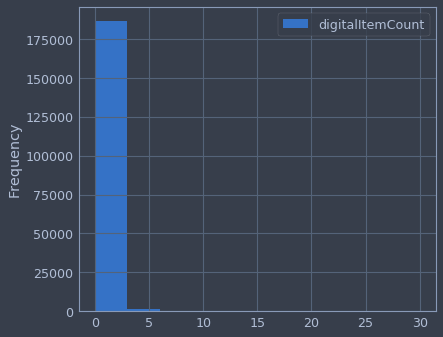

In [253]:
data[['digitalItemCount']].plot.hist()

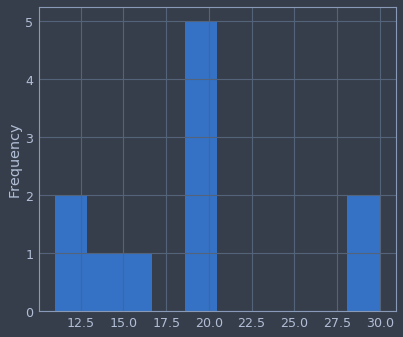

In [254]:
data[data['digitalItemCount']>10]['digitalItemCount'].plot.hist()
plt.show()

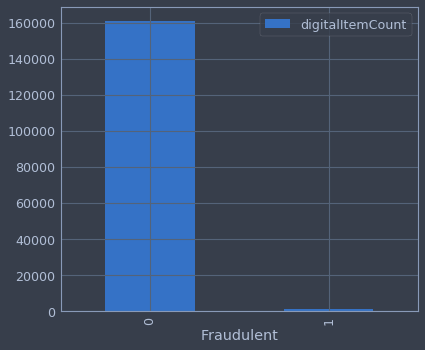

In [255]:
df=data[['digitalItemCount','Fraudulent']].groupby('Fraudulent').sum()
df.plot.bar()
plt.show()

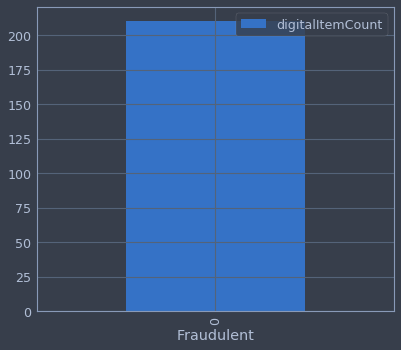

In [256]:
df=data[data['digitalItemCount']>10][['digitalItemCount','Fraudulent']].groupby('Fraudulent').sum()
df.plot.bar()
plt.show()

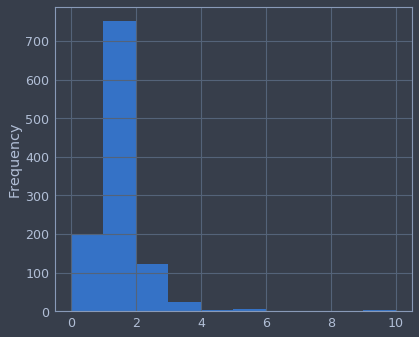

In [257]:
data[data['Fraudulent']==1]['digitalItemCount'].plot.hist()
plt.show()

#### 4. cvvVerifyResult

In [258]:
data[['cvvVerifyResult']].describe().T

,count,unique,top,freq
cvvVerifyResult,187823,8,M,164440


In [259]:
df=data[['cvvVerifyResult','transactionID','Fraudulent']].groupby(['cvvVerifyResult','Fraudulent']).count()
df.T

cvvVerifyResult       M          N    P      S    U     X   Y  blank    
Fraudulent            0     1    0    0  1   0    0     0   0      0   1
transactionID    163382  1058  302  533  4  29  269  1073  41  21088  44

#### 5. paymentBillingCountryCode

In [260]:
df=data[['paymentBillingCountryCode','transactionID','Fraudulent']].groupby(['paymentBillingCountryCode','Fraudulent']).count()
df

transactionID
paymentBillingCountryCode Fraudulent               
AD                        0                       9
                          1                       5
AE                        0                     104
                          1                       1
AF                        0                      16
AG                        0                       1
AI                        0                       1
AL                        0                       2
AM                        0                       3
AN                        0                       1
AO                        0                       2
AQ                        0                       8
AR                        0                     456
                          1                       4
AS                        0                      21
                          1                       2
AT                        0                     532
                          1                       1
AU                        0                    6190
                          1                      19
AW                        0                       4
AZ                        0                       6
BB                        0                      17
BD                        0                       4
BE                        0                     930
                          1                       3
BG                        0                      22
BH                        0                       6
BM                        0                      26
BN                        0                       3
BO                        0                       9
                          1                       1
BQ                        0                       5
BR                        0                    2501
                          1                       8
BS                        0                      20
BW                        0                       3
BY                        0                       8
BZ                        0                       6
CA                        0                    8763
                          1                     123
CG                        0                       5
CH                        0                    1333
                          1                       1
CI                        0                       3
CL                        0                     277
CM                        0                       2
CN                        0                     166
                          1                       1
CO                        0                     159
                          1                       1
CR                        0                      51
                          1                       1
CW                        0                       5
CX                        0                       3
CY                        0                      19
CZ                        0                     105
DE                        0                    4420
                          1                      10
DK                        0                    1366
DM                        0                       3
DO                        0                      14
DZ                        0                       1
EC                        0                      42
                          1                       1
EE                        0                      43
EG                        0                      20
ES                        0                     972
                          1                       5
ET                        0                       2
FI                        0                     739
                          1                       1
FJ                        0                       1
FM                        0                       2
FO                        0                       5
FR                        0       

#### 6. cardType

In [261]:
df=data[['cardType','transactionID','Fraudulent']].groupby(['cardType','Fraudulent']).count()
df

transactionID
cardType Fraudulent               
AMEX     0                   18529
         1                      25
DISCOVER 0                    4080
         1                      58
JCB      0                     283
MC       0                   45305
         1                     292
VISA     0                  100019
         1                     692
blank    0                   18501
         1                      39

#### 7. paymentInstrumentType

In [262]:
df=data[['paymentInstrumentType','transactionID','Fraudulent']].groupby(['paymentInstrumentType','Fraudulent']).count()
df

transactionID
paymentInstrumentType Fraudulent               
CREDITCARD            0                  168216
                      1                    1067
DIRECTDEBIT           0                       1
PAYPAL                0                   18500
                      1                      39

#### 8. browserLanguage

In [263]:
df=data[['browserLanguage','transactionID','Fraudulent']].groupby(['browserLanguage','Fraudulent']).count()
df

transactionID
browserLanguage Fraudulent               
ar-AE           0                      90
                1                       1
ar-BH           0                       3
ar-DZ           0                       1
ar-EG           0                      20
ar-JO           0                       3
ar-KW           0                      40
ar-LB           0                       2
ar-MA           0                       1
ar-OM           0                      16
ar-QA           0                      17
ar-SA           0                     112
                1                       1
ar-TN           0                       1
bg-BG           0                      20
ca-AD           0                       9
                1                       5
cs-CZ           0                     103
da-DK           0                    1352
de-AT           0                     515
                1                       1
de-CH           0                    1025
                1                       1
de-DE           0                    3984
                1                      10
de-LI           0                       4
de-LU           0                      34
el-CY           0                      17
el-GR           0                      84
en-AF           0                      16
en-AG           0                       1
en-AI           0                       1
en-AL           0                       2
en-AM           0                       2
en-AS           0                      20
                1                       2
en-AU           0                    5982
                1                      19
en-AW           0                       4
en-AZ           0                       6
en-BB           0                      16
en-BD           0                       4
en-BM           0                      24
en-BQ           0                       5
en-BS           0                      20
en-BW           0                       3
en-BZ           0                       2
en-CA           0                    7611
                1                     121
en-CW           0                       5
en-CX           0                       3
en-CY           0                       1
en-DM           0                       3
en-ET           0                       2
en-FJ           0                       1
en-FM           0                       2
en-FO           0                       3
en-GB           0                   10383
                1                      45
en-GD           0                       2
en-GE           0                       2
en-GG           0                       6
en-GH           0                       7
en-GI           0                       3
en-GL           0                       3
en-GU           0                      14
en-GY           0                       4
en-HK           0                      25
en-ID           0                      10
en-IE           0                     561
en-IL           0                      11
en-IN           0                     425
                1                       1
en-IS           0                      26
                1                       1
en-JE           0                       7
en-JM           0                      21
en-KE           0                       7
en-KH           0                       1
en-KN           0                       5
en-KY           0                      16
en-LA           0                       2
en-LC           0                       3
en-LK           0                       3
en-LR           0                       1
en-LY           0                       3
en-MD           0                       1
en-MG           0                       2
en-MH           0                       2
en-MM           0                       1
en-MN           0                       2
en-MP           0                       1
en-MT           0                       3
en-MU           0                     

#### 9. isProxyIP

In [264]:
df=data[['isProxyIP','transactionID','Fraudulent']].groupby(['isProxyIP','Fraudulent']).count()
df

transactionID
isProxyIP Fraudulent               
False     0                  178050
          1                    1069
True      0                    8667
          1                      37

#### 10 ipCountryCode

In [265]:
df=data[['ipCountryCode','transactionID','Fraudulent']].groupby(['ipCountryCode','Fraudulent']).count()
df

transactionID
ipCountryCode Fraudulent               
UG            0                       1
Ug            0                       1
ad            0                       1
ae            0                     177
              1                       1
af            0                      62
ag            0                       2
al            0                       4
am            0                       6
ao            0                       1
ar            0                     461
              1                       4
at            0                     512
              1                       1
au            0                    6104
              1                      17
aw            0                       5
ax            0                       1
az            0                      10
ba            0                       3
bb            0                      19
bd            0                       4
              1                       2
be            0                     933
              1                       3
bf            0                       1
bg            0                      24
bh            0                      24
bm            0                      28
bn            0                       4
bo            0                      11
              1                       1
bq            0                       3
br            0                    2519
              1                       8
bs            0                      27
bw            0                       4
by            0                      12
bz            0                       9
ca            0                    8449
              1                     120
cd            0                       6
cg            0                       1
ch            0                    1342
ci            0                       5
cl            0                     299
cm            0                       3
cn            0                     229
              1                       1
co            0                     176
              1                       1
cr            0                      68
              1                       1
cv            0                       1
cw            0                       8
cx            0                       1
cy            0                      24
cz            0                     121
de            0                    4378
              1                       9
dj            0                       3
dk            0                    1358
dm            0                       6
do            0                      35
dz            0                       5
ec            0                      62
              1                       1
ee            0                      42
eg            0                      30
es            0                    1172
              1                       3
et            0                       3
fi            0                     722
              1                       1
fj            0                       4
fk            0                       1
fm            0                       3
fo            0                       9
fr            0                    3820
              1                       9
ga            0                       2
gb            0                   11505
              1                      46
gd            0                       6
ge            0                       2
gf            0                       6
gg            0                      18
gh            0                      18
gi            0                       4
gl            0                       6
gp            0                      13
gq            0                       2
gr            0                     106
gt            0                      24
gu            0                      20
gy            0                       3
hk            0                     598
              1                       1
hn            0           

In [266]:
data['ipCountryCode']=[i.lower() for i in data['ipCountryCode']]
df=data[['ipCountryCode','transactionID','Fraudulent']].groupby(['ipCountryCode','Fraudulent']).count()
df

transactionID
ipCountryCode Fraudulent               
ad            0                       1
ae            0                     177
              1                       1
af            0                      62
ag            0                       2
al            0                       4
am            0                       6
ao            0                       1
ar            0                     461
              1                       4
at            0                     512
              1                       1
au            0                    6104
              1                      17
aw            0                       5
ax            0                       1
az            0                      10
ba            0                       3
bb            0                      19
bd            0                       4
              1                       2
be            0                     933
              1                       3
bf            0                       1
bg            0                      24
bh            0                      24
bm            0                      28
bn            0                       4
bo            0                      11
              1                       1
bq            0                       3
br            0                    2519
              1                       8
bs            0                      27
bw            0                       4
by            0                      12
bz            0                       9
ca            0                    8449
              1                     120
cd            0                       6
cg            0                       1
ch            0                    1342
ci            0                       5
cl            0                     299
cm            0                       3
cn            0                     229
              1                       1
co            0                     176
              1                       1
cr            0                      68
              1                       1
cv            0                       1
cw            0                       8
cx            0                       1
cy            0                      24
cz            0                     121
de            0                    4378
              1                       9
dj            0                       3
dk            0                    1358
dm            0                       6
do            0                      35
dz            0                       5
ec            0                      62
              1                       1
ee            0                      42
eg            0                      30
es            0                    1172
              1                       3
et            0                       3
fi            0                     722
              1                       1
fj            0                       4
fk            0                       1
fm            0                       3
fo            0                       9
fr            0                    3820
              1                       9
ga            0                       2
gb            0                   11505
              1                      46
gd            0                       6
ge            0                       2
gf            0                       6
gg            0                      18
gh            0                      18
gi            0                       4
gl            0                       6
gp            0                      13
gq            0                       2
gr            0                     106
gt            0                      24
gu            0                      20
gy            0                       3
hk            0                     598
              1                       1
hn            0                      23
hr            0                      21
              1           

#### 11 ipPostcode

In [267]:
df=data[['ipPostcode','transactionID','Fraudulent']].groupby(['ipPostcode','Fraudulent']).count()
df

transactionID
ipPostcode Fraudulent               
0          0                    5870
           1                      23
00-956     0                      94
004-0000   0                       1
010-0000   0                       2
           1                       1
01000-000  0                      26
01001-000  0                     597
           1                       1
020-0000   0                       2
038-0000   0                       2
040-0000   0                       1
041-0801   0                       1
060-0000   0                      11
           1                       2
060-0001   0                      25
06010-000  0                      18
06310-010  0                       2
06401-000  0                      12
06501-001  0                       3
06600-005  0                       1
06652-000  0                       1
067-0000   0                       1
06700-020  0                       2
06753-000  0                      34
06803-000  0                       1
07010-000  0                      19
07500-000  0                       4
07700-000  0                       2
08500-010  0                       5
08710-000  0                       7
09010-000  0                       8
           1                       1
09310-000  0                       3
09510-000  0                      21
09600-000  0                      12
09700-000  0                       1
09910-000  0                      23
1          0                      39
           1                       1
10-001     0                       2
100        0                     438
           1                      35
100-0000   0                     183
           1                      34
100-192    0                       2
1000       0                    1935
           1                      11
10000      0                     121
           1                       1
100000     0                     629
100002     0                      31
10001      0                      30
10003      0                      37
100031     0                       1
10004      0                      39
           1                       4
10005      0                      10
10006      0                       1
10007      0                       3
1001       0                     331
10010      0                       1
10011      0                      10
           1                       1
10012      0                      12
10013      0                       7
10014      0                       2
10015      0                       2
10016      0                      12
10017      0                      11
10018      0                      20
           1                       1
10019      0                       8
1002       0                      11
10020      0                    3512
           1                      23
10021      0                      14
           1                       1
10022      0                      20
           1                       2
10023      0                       6
10025      0                      22
10027      0                       1
10029      0                       2
1003       0                      13
10032      0                       3
10034      0                       1
10036      0                       6
10038      0                       1
10040      0                       2
1005       0                    1867
           1                       9
1006       0                    1555
           1                       5
10060      0                       1
101        0                      30
101-0051   0                       3
1010       0                       1
10100      0                      28
10101      0                      12
1011       0                       1
10112      0                       3
10117      0                       1
10121      0                       7
10122      0                       2
10150      0                       1
10158      0               

In [268]:
data=data.drop(["ipPostcode"],axis=1)

#### 12. ipState

In [269]:
df=data[['ipState','transactionID','Fraudulent']].groupby(['ipState','Fraudulent']).count()
df

,,transactionID
ipState,Fraudulent,
Abim,0,1
Bukoto,0,1
Kampala,0,2
Kawuku,0,1
Kintintale,0,1
Natete,0,1
Ug,0,2
`amman,0,5
a coruna,0,14


#### 13.  transactionIPaddress

In [270]:
data['transactionIPaddress'].tail(20)

199980    120.630
199981     78.240
199982     60.241
199983     60.225
199984    131.107
199985     74.134
199986    123.890
199987     77.188
199988    122.161
199989     24.800
199990    109.750
199991    158.158
199992     24.890
199993     71.940
199994     12.154
199995     24.540
199996     81.242
199997     67.252
199998     75.300
199999    213.245
Name: transactionIPaddress, dtype: float64

#### 14. transactionType

In [271]:
df=data[['transactionType','transactionID','Fraudulent']].groupby(['transactionType','Fraudulent']).count()
df

transactionID
transactionType Fraudulent               
P               0                  186717
                1                    1106

In [272]:
data=data.drop(["transactionType"],axis=1)

#### 15. transactionScenario

In [273]:
df=data[['transactionScenario','transactionID','Fraudulent']].groupby(['transactionScenario','Fraudulent']).count()
df

transactionID
transactionScenario Fraudulent               
A                   0                  186717
                    1                    1106

In [274]:
data=data.drop(["transactionScenario"],axis=1)

#### 16. localHour

In [275]:
df=data[['localHour','transactionID','Fraudulent']].groupby(['localHour','Fraudulent']).count()
df.T

localHour      0.0       1.0       2.0      3.0      4.0       5.0       6.0   \
Fraudulent        0   1     0   1     0   1    0   1    0   1     0   1     0   
transactionID  2809  34  1771  27  1054  21  825  32  914  17  1516  23  2966   

localHour          7.0       8.0        9.0        10.0       11.0       12.0  \
Fraudulent      1     0   1     0   1      0   1      0   1      0   1      0   
transactionID  33  5176  34  8469  43  10815  60  12077  61  11938  77  11930   

localHour           13.0       14.0       15.0       16.0       17.0      \
Fraudulent      1      0   1      0   1      0   1      0   1      0   1   
transactionID  65  12368  67  12313  70  12339  65  11538  59  11115  49   

localHour       18.0       19.0       20.0      21.0      22.0      23.0      
Fraudulent         0   1      0   1      0   1     0   1     0   1     0   1  
transactionID  11209  51  11530  55  11292  43  9456  43  6762  37  4535  40

#### 17. transactionTime

In [276]:
data['transactionTime'].head()

0    215203
1     23702
2    195208
3    200850
4    205433
Name: transactionTime, dtype: int64

In [277]:
data['transaction_sec']=data['transactionTime']%100

In [278]:
data['transaction_min']=(data['transactionTime']%10000-data['transactionTime']%100)/100

In [279]:
data['transaction_hr']=(data['transactionTime']-data['transactionTime']%10000)/10000

In [280]:
data=data.drop(['transactionTime'],axis=1)

#### 18. transactionDate

In [281]:
data['transactionDate'].head()

0    20130526
1    20130526
2    20130524
3    20130524
4    20130524
Name: transactionDate, dtype: int64

In [282]:
data=data.drop(['transactionCurrencyConversionRate','transactionAmount'],axis=1)

#### 19. transactionCurrencyCode

In [283]:
df=data[['transactionCurrencyCode','transactionID','Fraudulent']].groupby(['transactionCurrencyCode','Fraudulent']).count()
df

transactionID
transactionCurrencyCode Fraudulent               
ARS                     0                     351
                        1                       3
AUD                     0                    6004
                        1                      19
BGN                     0                      15
BHD                     0                       3
BRL                     0                    2471
                        1                       8
CAD                     0                    8354
                        1                     123
CHF                     0                    1268
CLP                     0                     235
CNY                     0                     147
                        1                       1
COP                     0                     144
                        1                       1
CRC                     0                      48
                        1                       1
CZK                     0                      98
DKK                     0                    1353
DZD                     0                       1
EGP                     0                      18
EUR                     0                   14516
                        1                      51
GBP                     0                   10283
                        1                      45
GTQ                     0                      15
HKD                     0                     608
                        1                       8
HUF                     0                      58
IDR                     0                      89
                        1                       2
ILS                     0                     281
INR                     0                     428
                        1                       1
ISK                     0                      31
                        1                       1
JOD                     0                       4
JPY                     0                    1602
                        1                      63
KES                     0                       5
KRW                     0                     756
KWD                     0                      40
KZT                     0                       3
LBP                     0                       2
LKR                     0                       3
LTL                     0                      15
LVL                     0                      28
MAD                     0                       1
MXN                     0                     924
                        1                       8
MYR                     0                      73
NGN                     0                      30
NOK                     0                    1602
                        1                       2
NZD                     0                     543
OMR                     0                      16
PEN                     0                      47
PHP                     0                      76
                        1                       1
PKR                     0                       9
PLN                     0                     150
PYG                     0                       7
QAR                     0                      20
RON                     0                      36
RSD                     0                       5
RUB                     0                    1115
SAR                     0                     117
                        1                       1
SEK                     0                    1380
                        1                       2
SGD                     0                     616
                        1                       7
THB                     0                     114
                        1                       1
TND                     0                       2
TRY                     0                     254
TTD                     0                      24
TWD                     0           

#### 20. TransactionamountUSD

In [284]:
data.columns=['transactionID', 'accountID', 'TransactionamountUSD',
       'transactionCurrencyCode', 'transactionDate', 'localHour',
       'transactionIPaddress', 'ipState', 'ipCountryCode', 'isProxyIP',
       'browserLanguage', 'paymentInstrumentType', 'cardType',
       'paymentBillingCountryCode', 'cvvVerifyResult', 'digitalItemCount',
       'physicalItemCount', 'Fraudulent', 'paymentBillingState_clean',
       'transaction_sec', 'transaction_min', 'transaction_hr']
df=data[['TransactionamountUSD','Fraudulent']].groupby(['Fraudulent']).mean()
df

,TransactionamountUSD
Fraudulent,
0,224.843035
1,327.178552


In [285]:
data[['TransactionamountUSD']].describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionamountUSD,187823.0,225.44564,867.319085,0.0,84.99,139.99,187.8833,132568.67


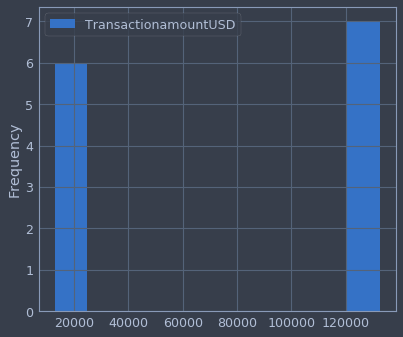

In [286]:
data[data['TransactionamountUSD']>12925.44564][['TransactionamountUSD']].plot.hist()

In [287]:
data=data.drop(["accountID","transactionID","transactionDate"],axis=1)

In [288]:
data.dtypes

TransactionamountUSD         float64
transactionCurrencyCode       object
localHour                    float64
transactionIPaddress         float64
ipState                       object
ipCountryCode                 object
isProxyIP                     object
browserLanguage               object
paymentInstrumentType         object
cardType                      object
paymentBillingCountryCode     object
cvvVerifyResult               object
digitalItemCount               int64
physicalItemCount              int64
Fraudulent                     int64
paymentBillingState_clean     object
transaction_sec                int64
transaction_min              float64
transaction_hr               float64
dtype: object

# STEP 2. DATA TRANSFORMATION

1. Number encoding

In [289]:
num_col=["transactionCurrencyCode","ipState","ipCountryCode","browserLanguage","paymentBillingCountryCode","paymentBillingState_clean"]
one_hot_col=["cardType","cvvVerifyResult","paymentInstrumentType","isProxyIP"]

In [290]:
num_data=data.drop(num_col+one_hot_col,axis=1)
num_data.head()

,TransactionamountUSD,localHour,transactionIPaddress,digitalItemCount,physicalItemCount,Fraudulent,transaction_sec,transaction_min,transaction_hr
0,5.36,16.0,67.80,1,0,0,3,52.0,21.0
1,4.99,18.0,76.94,1,0,0,2,37.0,2.0
2,4.99,11.0,24.50,1,0,0,8,52.0,19.0
3,4.99,12.0,24.50,1,0,0,50,8.0,20.0
4,4.99,12.0,24.50,1,0,0,33,54.0,20.0


In [291]:
one_hot_data=pd.get_dummies(data[one_hot_col])

In [292]:
from sklearn.preprocessing import LabelEncoder
num_encoder = LabelEncoder()
for obj in num_col:
     num_data[obj]= num_encoder.fit_transform(data[obj])

In [293]:
num_data=num_data.join(one_hot_data)
num_data.head()

,TransactionamountUSD,localHour,transactionIPaddress,digitalItemCount,physicalItemCount,Fraudulent,transaction_sec,transaction_min,transaction_hr,transactionCurrencyCode,ipState,ipCountryCode,browserLanguage,paymentBillingCountryCode,paymentBillingState_clean,cardType_AMEX,cardType_DISCOVER,cardType_JCB,cardType_MC,cardType_VISA,cardType_blank,cvvVerifyResult_M,cvvVerifyResult_N,cvvVerifyResult_P,cvvVerifyResult_S,cvvVerifyResult_U,cvvVerifyResult_X,cvvVerifyResult_Y,cvvVerifyResult_blank,paymentInstrumentType_CREDITCARD,paymentInstrumentType_DIRECTDEBIT,paymentInstrumentType_PAYPAL,isProxyIP_False,isProxyIP_True
0,5.36,16.0,67.80,1,0,0,3,52.0,21.0,60,659,182,99,164,510,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,4.99,18.0,76.94,1,0,0,2,37.0,2.0,60,159,182,99,164,114,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,4.99,11.0,24.50,1,0,0,8,52.0,19.0,60,159,182,99,164,114,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
3,4.99,12.0,24.50,1,0,0,50,8.0,20.0,60,159,182,99,164,114,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,4.99,12.0,24.50,1,0,0,33,54.0,20.0,60,159,182,99,164,114,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [294]:

num_data.to_csv("num_data.csv")
num_data.shape
num_data=num_data.drop(['transaction_sec',"transaction_min"],axis=1)

In [295]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(num_data.drop(["Fraudulent"],axis=1),
                                                num_data["Fraudulent"],test_size=0.33,random_state=123)

In [296]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train)


In [297]:
y_train_res.sum()/y_train_res.shape[0]

0.5

In [298]:
import numpy as np
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(random_state=123, solver='lbfgs',
                           multi_class='multinomial', max_iter=1000).fit(x_train_res, y_train_res)
pred=model.predict(x_test)
confusion_matrix(y_test,pred)

/home/dalmas/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[38473, 23129],
       [  125,   255]])

In [299]:
predicted=pd.DataFrame(pred)
predicted.columns= ["predictions"]
predicted['Fraud']=y_test.values.astype(str)
predicted.join(pd.DataFrame(model.predict_proba(x_test))).head()

,predictions,Fraud,0,1
0,0,0,0.741256,0.258744
1,0,0,0.860686,0.139314
2,0,0,0.870691,0.129309
3,0,0,0.549806,0.450194
4,1,0,0.192743,0.807257


In [300]:
THRESHOLD = 0.35
preds = np.where(model.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
predicted=pd.DataFrame(preds)
predicted.columns= ["predictions"]
predicted['Fraud']=y_test.values.astype(str)
predicted.join(pd.DataFrame(model.predict_proba(x_test))).head(10)

,predictions,Fraud,0,1
0,0,0,0.741256,0.258744
1,0,0,0.860686,0.139314
2,0,0,0.870691,0.129309
3,1,0,0.549806,0.450194
4,1,0,0.192743,0.807257
5,1,0,0.582956,0.417044
6,0,0,0.665019,0.334981
7,1,0,0.489240,0.510760
8,1,0,0.364674,0.635326
9,1,0,0.437804,0.562196


In [301]:
pred=model.predict(x_test)
confusion_matrix(y_test,preds)

array([[19796, 41806],
       [   42,   338]])

In [302]:
models=[]
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,preds)
mat

array([[19796, 41806],
       [   42,   338]])

In [303]:
acc=(mat[0,0]+mat[1,1])/(mat[0,0]+mat[0,1]+mat[1,0]+mat[1,1])*100
rec=mat[1,1]/(mat[1,1]+mat[0,1])*100
pre=mat[1,1]/(mat[1,1]+mat[1,0])*100
print("accuracy is {}% , recall is {}% and precision is {}%".format(np.round(acc,2),np.round(rec,2),np.round(pre,2)))
models.append(["logistic",acc,rec,pre])

accuracy is 32.48% , recall is 0.8% and precision is 88.95%


In [305]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train_res, y_train_res)
naive_pred=naive.predict(x_test)
naive_mat=confusion_matrix(y_test,naive_pred)
naive_acc=(naive_mat[0,0]+naive_mat[1,1])/(naive_mat[0,0]+
                                           naive_mat[0,1]+naive_mat[1,0]+naive_mat[1,1])*100
naive_rec=naive_mat[1,1]/(naive_mat[1,1]+naive_mat[0,1])*100
naive_pre=naive_mat[1,1]/(naive_mat[1,1]+naive_mat[1,0])*100
print("accuracy is {}% , recall is {}% and precision is {}%".format(naive_acc,naive_rec,naive_pre))
models.append(["NaiveBayes",naive_acc,naive_rec,naive_pre])

accuracy is 27.098189797037847% , recall is 0.7518135854033854% and precision is 90.0%


In [ ]:
from sklearn import svm
svm_model = svm.SVC(gamma='scale')
svm_model.fit(x_train_res, y_train_res)
svm_pred=svm_model.predict(x_test)
svm_mat=confusion_matrix(y_test,svm_pred)
svm_acc=(svm_mat[0,0]+svm_mat[1,1])/(svm_mat[0,0]+svm_mat[0,1]+svm_mat[1,0]+svm_mat[1,1])*100
svm_rec=svm_mat[1,1]/(svm_mat[1,1]+svm_mat[0,1])*100
svm_pre=svm_mat[1,1]/(svm_mat[1,1]+svm_mat[1,0])*100
print("accuracy is {}% , recall is {}% and precision is {}%".format(svm_acc,svm_rec,svm_pre))
models.append(["svm",svm_acc,svm_rec,svm_pre])

In [306]:
from sklearn.ensemble import GradientBoostingClassifier
XGBoost = GradientBoostingClassifier(n_estimators=250)
XGBoost.fit(x_train_res, y_train_res)
XGB_pred=XGBoost.predict(x_test)
XGB_mat=confusion_matrix(y_test,XGB_pred)
XGB_acc=(XGB_mat[0,0]+XGB_mat[1,1])/(XGB_mat[0,0]+XGB_mat[0,1]+XGB_mat[1,0]+XGB_mat[1,1])*100
XGB_rec=XGB_mat[1,1]/(XGB_mat[1,1]+XGB_mat[0,1])*100
XGB_pre=XGB_mat[1,1]/(XGB_mat[1,1]+XGB_mat[1,0])*100
print("accuracy is {}% , recall is {}% and precision is {}%".format(XGB_acc,XGB_rec,XGB_pre))
models.append(["XGBoost",XGB_acc,XGB_rec,XGB_pre])

accuracy is 98.62702074795908% , recall is 9.043478260869566% and precision is 13.684210526315791%


In [307]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train_res, y_train_res)
neigh_pred=neigh.predict(x_test)
neigh_mat=confusion_matrix(y_test,neigh_pred)
neigh_acc=(neigh_mat[0,0]+neigh_mat[1,1])/(neigh_mat[0,0]+
                                           neigh_mat[0,1]+neigh_mat[1,0]+neigh_mat[1,1])*100
neigh_rec=neigh_mat[1,1]/(neigh_mat[1,1]+neigh_mat[0,1])*100
neigh_pre=neigh_mat[1,1]/(neigh_mat[1,1]+neigh_mat[1,0])*100
print("accuracy is {}% , recall is {}% and precision is {}%".format(neigh_acc,neigh_rec,neigh_pre))
models.append(["knn",neigh_acc,neigh_rec,neigh_pre])
print(neigh_mat)

accuracy is 94.03052499112646% , recall is 3.160270880361174% and precision is 29.47368421052631%
[[58170  3432]
 [  268   112]]


In [308]:
mods=pd.DataFrame(models)
mods.columns=["algorithm","accuracy","recall","precision"]
mods

,algorithm,accuracy,recall,precision
0,logistic,32.483624,0.802012,88.947368
1,NaiveBayes,27.098190,0.751814,90.000000
2,NaiveBayes,27.098190,0.751814,90.000000
3,XGBoost,98.627021,9.043478,13.684211
4,knn,94.030525,3.160271,29.473684


In [309]:
XGB_mat

array([[61079,   523],
       [  328,    52]])

defining the tensoflow model